In [1]:
import pandas as pd

In [2]:
incels_df = pd.read_csv('incels_forum_data.csv', encoding = 'utf-8')

In [3]:
incels_df.head()

,Title,Tags,Poster,Date,Views,Replies,Post Content
0,Rules and FAQ,Untagged,Incels,"Nov 9, 2017",350000,14,Welcome!\n\nThis is a forum for male involunta...
1,Introduction to Incels,Untagged,Incels,"Jan 18, 2018",75000,0,Introduction to Incels\n\nWhat does incel mean...
2,Does longterm inceldom destroy a man's pairbon...,Serious,Divergent_Integral,"Sep 26, 2021",32000,208,"In my case, I'm afraid it has. If an attractiv..."
3,Autistic women perceived more favorably than a...,JFL,Edmund_Kemper,"Jun 6, 2022",15000,122,Introduction:\n\nParticipants in multiple stud...
4,Are Women Programmed to Cheat?,Theory,Overdosed,"Jul 1, 2021",18000,114,Is extra-pair copulation (EPC or infidelity) b...


In [4]:
incels_tags = list(incels_df['Tags'])

In [6]:
set(incels_tags)

{'Based',
 'Blackpill',
 'Brutal',
 'Discussion',
 'Experiment',
 'Hypocrisy',
 "It's Over",
 'JFL',
 'LDAR',
 'LifeFuel',
 'News',
 'RageFuel',
 'Serious',
 'Soy',
 'Story',
 'SuicideFuel',
 'TeeHee',
 'Theory',
 'Toxic Femininity',
 'Untagged',
 'Venting'}

women     1953
men       1634
https      655
people     631
like       625
sex        565
click      564
com        564
expand     562
sexual     562
just       424
female     421
www        386
man        371
study      366
woman      357
age        350
don        334
social     331
male       329
dtype: int64


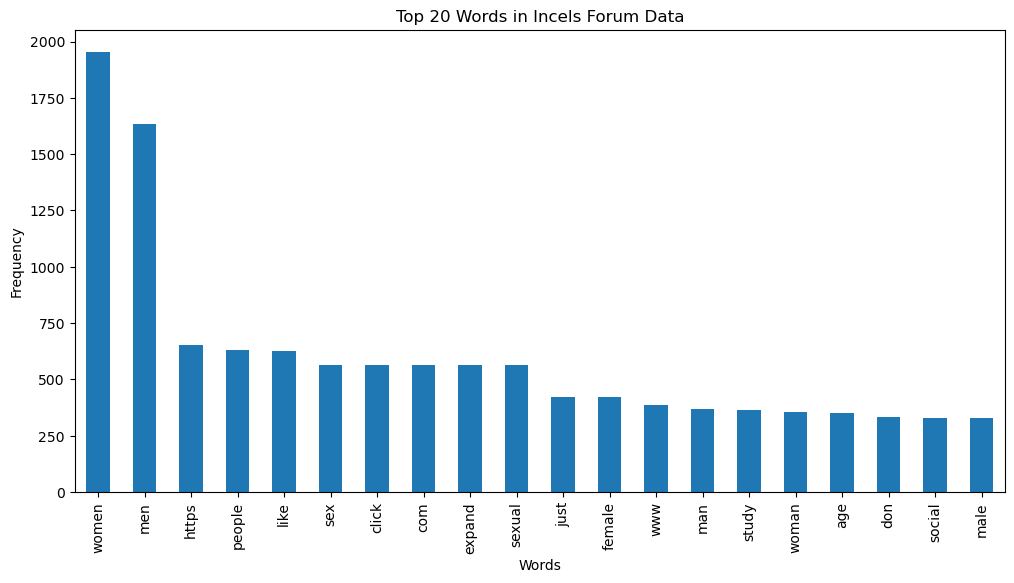

In [7]:

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt



corpus = incels_df['Post Content'].astype(str)

# Tokenization and counting word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(corpus)

# Creating a DataFrame with word frequencies
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Summing up the word frequencies
word_freq_sum = word_freq_df.sum()

# Sorting the words by frequency
sorted_word_freq = word_freq_sum.sort_values(ascending=False)

# Displaying the top N words and their frequencies
top_n_words = 20
print(sorted_word_freq.head(top_n_words))

# Plotting the top N words
plt.figure(figsize=(12, 6))
sorted_word_freq.head(top_n_words).plot(kind='bar')
plt.title('Top {} Words in Incels Forum Data'.format(top_n_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


blackpill     108
untagged       28
serious        11
brutal          7
discussion      7
theory          6
jfl             6
based           5
over            4
it              4
dtype: int64


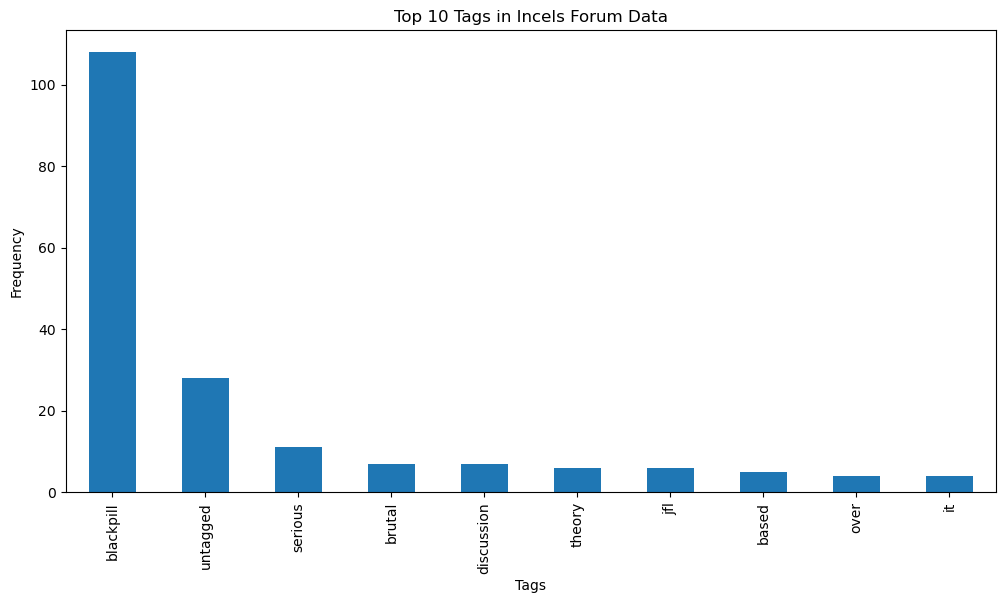

In [8]:
# Assuming the 'tags' column contains the tags data
tags_corpus = incels_df['Tags'].astype(str)

# Tokenization and counting tag frequencies
tags_vectorizer = CountVectorizer()
tags_X = tags_vectorizer.fit_transform(tags_corpus)

# Creating a DataFrame with tag frequencies
tags_freq_df = pd.DataFrame(tags_X.toarray(), columns=tags_vectorizer.get_feature_names_out())

# Summing up the tag frequencies
tags_freq_sum = tags_freq_df.sum()

# Sorting the tags by frequency
sorted_tags_freq = tags_freq_sum.sort_values(ascending=False)

# Displaying the top N tags and their frequencies
top_n_tags = 10
print(sorted_tags_freq.head(top_n_tags))

# Plotting the top N tags
plt.figure(figsize=(12, 6))
sorted_tags_freq.head(top_n_tags).plot(kind='bar')
plt.title('Top {} Tags in Incels Forum Data'.format(top_n_tags))
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()


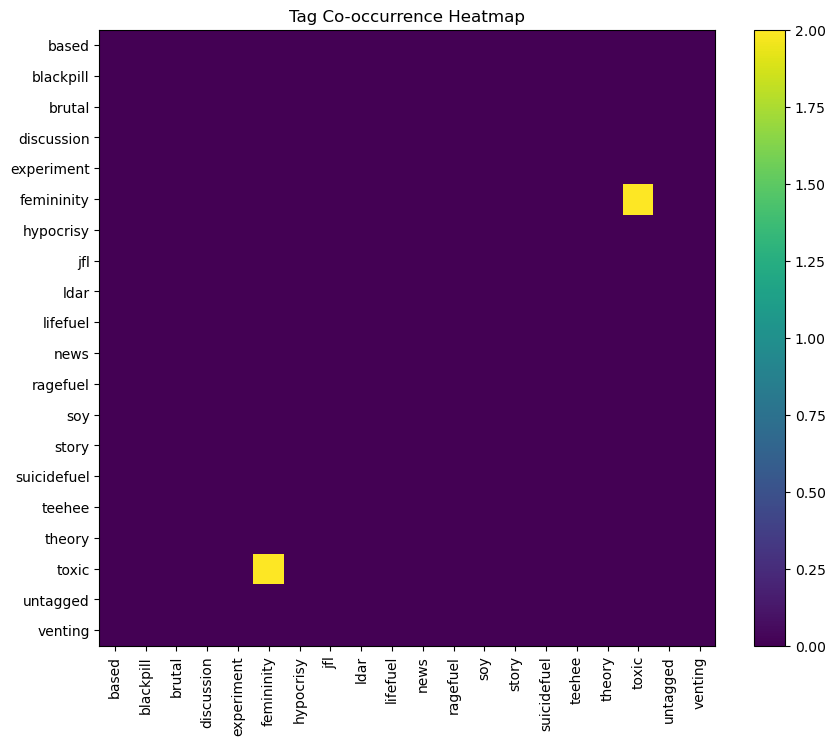

In [10]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer

# Create a new vectorizer with custom stop words
custom_stop_words = set(ENGLISH_STOP_WORDS)
custom_stop_words.update(['incel', 'forum', 'tags', 'it'])  # Additional stop words
tags_vectorizer_co = CountVectorizer(stop_words= list(custom_stop_words))
tags_X_co = tags_vectorizer_co.fit_transform(tags_corpus)

# Create a co-occurrence matrix
co_occurrence_matrix = tags_X_co.T * tags_X_co
co_occurrence_matrix.setdiag(0)

# Visualize the co-occurrence matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(co_occurrence_matrix.toarray(), cmap='viridis', interpolation='nearest')
plt.title('Tag Co-occurrence Heatmap')
plt.xticks(range(len(tags_vectorizer_co.get_feature_names_out())), tags_vectorizer_co.get_feature_names_out(), rotation=90)
plt.yticks(range(len(tags_vectorizer_co.get_feature_names_out())), tags_vectorizer_co.get_feature_names_out())
plt.colorbar()
plt.show()


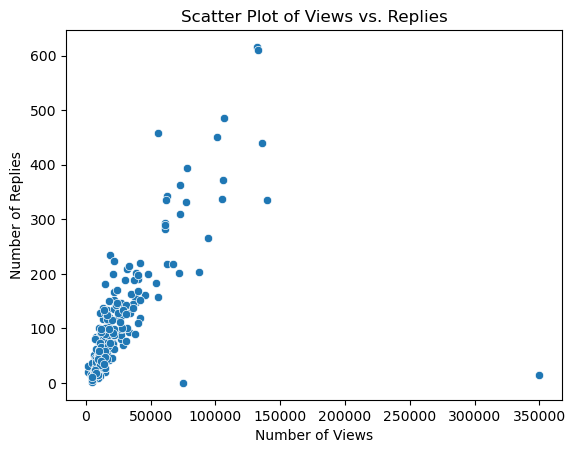

In [11]:
import seaborn as sns

# Assuming 'views' and 'replies' are the columns representing the number of views and replies in your DataFrame
sns.scatterplot(x='Views', y='Replies', data=incels_df)
plt.title('Scatter Plot of Views vs. Replies')
plt.xlabel('Number of Views')
plt.ylabel('Number of Replies')
plt.show()


In [13]:
# Display topics with the highest number of views
top_views_topics = incels_df.sort_values(by='Views', ascending=False).head(10)
print("Top Topics by Views:")
print(top_views_topics[['Title', 'Views']])

# Display topics with the highest number of replies
top_replies_topics = incels_df.sort_values(by='Replies', ascending=False).head(10)
print("\nTop Topics by Replies:")
print(top_replies_topics[['Title', 'Replies']])


Top Topics by Views:
                                                Title   Views
0                                       Rules and FAQ  350000
84      This is what every foid thinks about ugly men  140000
44  Roundup of Thailand Trip - girls, advice, conv...  136000
63  Holy shit chad posts 1 minute videa of his fac...  133000
28                 Gentlemen, give it up for @itsOVER  132000
45  [Tinder Experiment] Ugly gymcel gets hot Tinde...  107000
61  [Tinder Experiment] 5'7 incel gets more than 4...  106000
26  Women gain sexual pleasure from the pain that ...  105000
73  The Life and Times of itsOVER (Legendary white...  101000
10  Females are Psychopaths – A Socio-Historic Review   94000

Top Topics by Replies:
                                                Title  Replies
28                 Gentlemen, give it up for @itsOVER      616
63  Holy shit chad posts 1 minute videa of his fac...      610
45  [Tinder Experiment] Ugly gymcel gets hot Tinde...      485
9   r/IncelTears face

In [14]:
incels_df

,Title,Tags,Poster,Date,Views,Replies,Post Content
0,Rules and FAQ,Untagged,Incels,"Nov 9, 2017",350000,14,Welcome!\n\nThis is a forum for male involunta...
1,Introduction to Incels,Untagged,Incels,"Jan 18, 2018",75000,0,Introduction to Incels\n\nWhat does incel mean...
2,Does longterm inceldom destroy a man's pairbon...,Serious,Divergent_Integral,"Sep 26, 2021",32000,208,"In my case, I'm afraid it has. If an attractiv..."
3,Autistic women perceived more favorably than a...,JFL,Edmund_Kemper,"Jun 6, 2022",15000,122,Introduction:\n\nParticipants in multiple stud...
4,Are Women Programmed to Cheat?,Theory,Overdosed,"Jul 1, 2021",18000,114,Is extra-pair copulation (EPC or infidelity) b...
...,...,...,...,...,...,...,...
204,Another pro scientific study confirms the blac...,Blackpill,SuperPerfectCel,"May 14, 2018",8000,18,https://ifstudies.org/blog/male-sexlessness-is...
205,Study on the sexual market of Tinder,Blackpill,_incelinside,"May 21, 2018",14000,35,https://medium.com/@worstonlinedate...ably-bet...
206,"""Love at first sight"" is a real, scientificall...",Blackpill,CreationalTarget,"May 9, 2018",5000,6,Several studies have shown that immediate attr...
207,Racepill Part 5 - nature vs nurture,Blackpill,13k,"May 14, 2018",10000,58,I've said this before and I say it here once a...


In [19]:
incels_df.groupby('Poster').sum().sort_values(by = 'Views',ascending = False)

C:\Users\User\AppData\Local\Temp\ipykernel_15192\1971189093.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  incels_df.groupby('Poster').sum().sort_values(by = 'Views',ascending = False)


,Views,Replies
Poster,,
Incels,425000,14
Edmund_Kemper,422000,2493
13k,343000,1522
Gymcelled,309000,1611
BlkPillPres,275000,997
...,...,...
based_meme,5000,36
AddictedToPorn,5000,11
Deleted member 20659,5000,11


In [22]:
text = str(corpus)

-1